In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("NSE-Tata_Global_Beverages_Limited.csv")

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [8]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
x=df[['High','Low','Last','Open','Total Trade Quantity','Turnover (Lacs)']].values
y=df[['Close']].values 

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [11]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [12]:
print("Intercept :",lm.intercept_)
print("Coeffiecent :",lm.coef_)

Intercept : [0.02668292]
Coeffiecent : [[ 1.06698393e-01  7.99293440e-02  8.83119919e-01 -7.01575947e-02
   2.18121837e-08 -2.12307007e-05]]


In [13]:
y_pred = lm.predict(x_test)

In [14]:
y_pred

array([[153.28204195],
       [223.02502409],
       [153.03290593],
       [133.18610369],
       [317.21191287],
       [122.49054342],
       [161.71324084],
       [127.71636343],
       [141.16630205],
       [163.4295278 ],
       [173.87053106],
       [118.27467187],
       [119.9013584 ],
       [157.53199753],
       [233.30491952],
       [119.9300881 ],
       [243.65517644],
       [302.75944464],
       [153.37743876],
       [159.45407937],
       [255.59165817],
       [138.64936203],
       [142.79619882],
       [142.39274088],
       [175.21509428],
       [126.70908131],
       [152.84856911],
       [132.19801755],
       [118.01673756],
       [109.03061494],
       [141.97583355],
       [153.73452648],
       [106.84890989],
       [244.08787684],
       [153.88471283],
       [146.07138467],
       [135.94073219],
       [278.4957067 ],
       [124.04762007],
       [132.80406063],
       [151.85593089],
       [122.50431711],
       [232.64806612],
       [144

In [15]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 0.30096007593751023
MSE: 0.17384688133228532
RMSE: 0.41694949494187583
R2 Score: 0.9999252378533732


<Axes: >

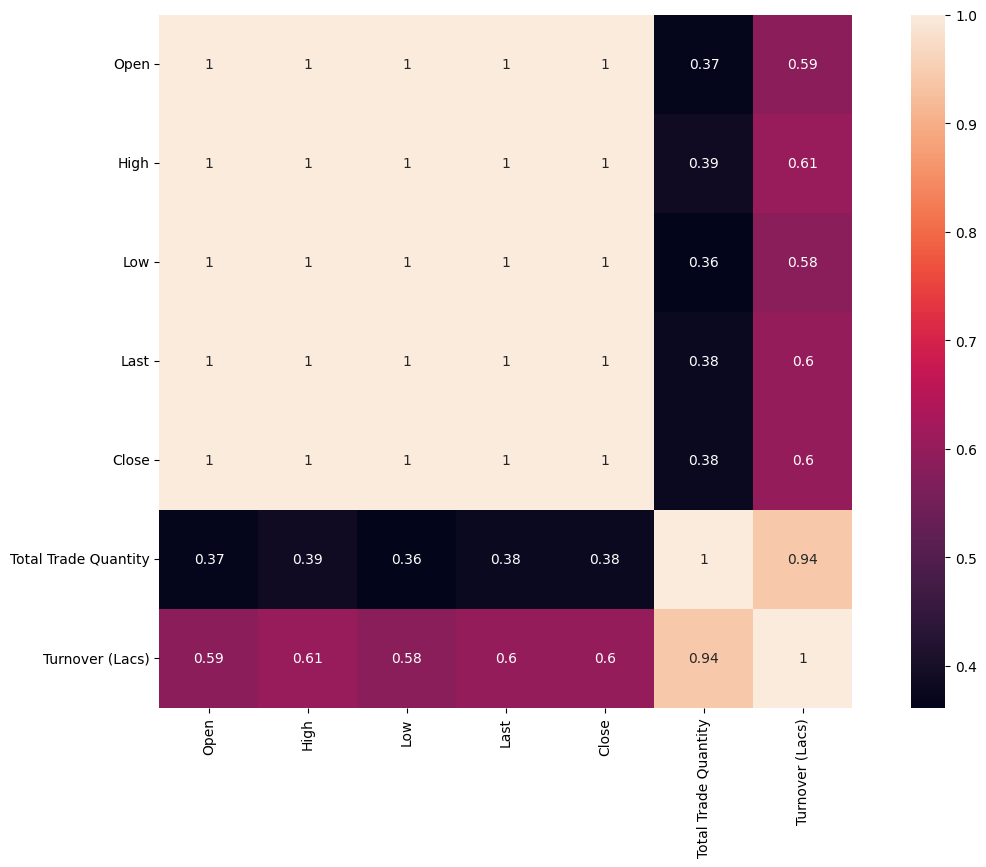

In [17]:
plt.subplots(figsize=(15,9))
sns.heatmap(df.corr(numeric_only=True),square=True,annot=True)